In [2]:
import nltk
from nltk.tokenize import word_tokenize

# nltk.download("punkt_tab")
text = "Unstructured data processing with Python is powerful!"
tokens = word_tokenize(text)
print(tokens)

['Unstructured', 'data', 'processing', 'with', 'Python', 'is', 'powerful', '!']


In [4]:
# extracting text from pdf file pages
import pdfplumber
with pdfplumber.open("C:/Users/Dell/Desktop/Python Practice/source_datafiles/unstructured_data.pdf") as pdf:
    for page in pdf.pages:
        print(page.extract_text())

Unstructured Data Processing with Python - Full Guide
1. Installation Guide
1. Install Python (3.11 or 3.12 recommended) from https://www.python.org/downloads/
- Add Python to PATH during installation
- Install pip
2. Create and activate a virtual environment:
Windows: unstructured_env\Scripts\activate
Linux/Mac: source unstructured_env/bin/activate
3. Install required libraries with pip
4. Run Jupyter Notebook for experiments


In [5]:
# Download NLTK resources (only needed first time)
# nltk.download("punkt")
# nltk.download("stopwords")

In [7]:
import spacy
# nlp = spacy.load("en_core_web_sm")
print("✅ Setup complete!")

✅ Setup complete!


✅ Setup complete!
Original Text: Unstructured data processing with Python is powerful and flexible!
Tokens: ['Unstructured', 'data', 'processing', 'with', 'Python', 'is', 'powerful', 'and', 'flexible', '!']
Filtered: ['Unstructured', 'data', 'processing', 'Python', 'powerful', 'flexible', '!']

Named Entities:
Unstructured → ORG

Extracted text from PDF:
 Unstructured Data Processing with Python - Full Guide
1. Installation Guide
1. Install Python (3.11 or 3.12 recommended) from https://www.python.org/downloads/
- Add Python to PATH during installation
- Install pip
2. Create and activate a virtual environment:
Windows: unstructured_env\Scripts\activate
Linux/Mac: source unstructured_env/bin/activate
3. Install required libraries with pip
4. Run Jupyter Notebook for experiments


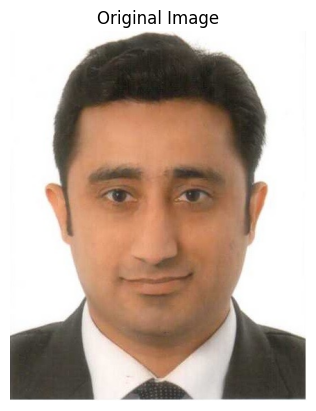

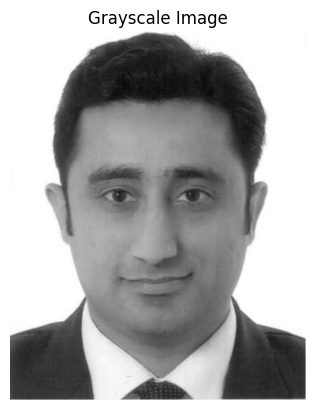

✅ Image processed successfully.


In [8]:
# 📘 Unstructured Data Processing Starter Notebook

# ==============
# 1. Setup
# ==============
import nltk
import spacy
import pdfplumber
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Download NLTK resources (only needed first time)
# nltk.download("punkt")
# nltk.download("stopwords")

# Load spaCy model (needs download: python -m spacy download en_core_web_sm)
nlp = spacy.load("en_core_web_sm")

print("✅ Setup complete!")

# ==============
# 2. Text Processing
# ==============
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

text = "Unstructured data processing with Python is powerful and flexible!"

# Tokenize
tokens = word_tokenize(text)

# Remove stopwords
stop_words = set(stopwords.words("english"))
filtered = [w for w in tokens if w.lower() not in stop_words]

print("Original Text:", text)
print("Tokens:", tokens)
print("Filtered:", filtered)

# spaCy Named Entity Recognition
doc = nlp(text)
print("\nNamed Entities:")
for ent in doc.ents:
    print(ent.text, "→", ent.label_)

# ==============
# 3. PDF Processing
# ==============
pdf_path = "unstructured_data.pdf"  # PDF file containing text
try:
    with pdfplumber.open("C:/Users/Dell/Desktop/Python Practice/source_datafiles/unstructured_data.pdf") as pdf:
        first_page = pdf.pages[0]
        pdf_text = first_page.extract_text()
        print("\nExtracted text from PDF:\n", pdf_text)
except Exception as e:
    print("⚠️ Could not open PDF:", e)

# ==============
# 4. Image Processing
# ==============

img_path = "C:/Users/Dell/Desktop/Python Practice/source_datafiles/mypic.jpg"  # replace with your image

try:
    # Open image with Pillow
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")
    plt.show()

    # Convert to grayscale with OpenCV
    cv_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(cv_img, cmap="gray")
    plt.title("Grayscale Image")
    plt.axis("off")
    plt.show()

    print("✅ Image processed successfully.")
except Exception as e:
    print("⚠️ Could not process image:", e)


In [27]:
import pdfplumber
import pandas as pd

# Path to your PDF
pdf_path = r"C:/Users/Dell/Desktop/Python Practice/outputfiles/invoice_1.pdf"

# all tables in pdf
all_tables = []

with pdfplumber.open(pdf_path) as pdf:
    for page_number, page in enumerate(pdf.pages, start=1):
        # Extract tables on this page
        tables = page.extract_tables()
       
        for table_number, table in enumerate(tables, start=1):
            # Convert table to DataFrame (layout preserved)
            df_tables= pd.DataFrame(table[1:], columns=table[0]);
            df = pd.DataFrame(table[1:], columns=table[0])
            df['Page'] = page_number  # Optional: keep track of page
            df['Table_Number'] = table_number
            all_tables.append(df)

# Combine all tables if needed
if all_tables:
    final_df = pd.concat(all_tables, ignore_index=True)
else:
    final_df = pd.DataFrame()

# Show table
print (df_tables)

print(final_df)

# Optionally save to Excel/CSV
final_df.to_excel(r"C:\Users\Dell\Desktop\Python Practice\Outputfiles\output_invoice_tables.xlsx", index=False)
final_df.to_csv(r"C:\Users\Dell\Desktop\Python Practice\Outputfiles\output_invoice_tables.csv", index=False)


      Product Quantity   Unit Price         Total Price
0      Laptop        9       413.24             3719.16
1  Smartphone        6        302.1  1812.6000000000001
2  Smartphone        1       163.71              163.71
3     Charger        1       437.96              437.96
4       Mouse        8       445.82             3566.56
5  Headphones        8       209.85              1678.8
6   USB Cable        2       121.23              242.46
7     Charger       10        59.32               593.2
8                       Grand Total            12214.45
      Product Quantity   Unit Price         Total Price  Page  Table_Number
0      Laptop        9       413.24             3719.16     1             1
1  Smartphone        6        302.1  1812.6000000000001     1             1
2  Smartphone        1       163.71              163.71     1             1
3     Charger        1       437.96              437.96     1             1
4       Mouse        8       445.82             3566.56     

In [11]:
from reportlab.lib.pagesizes import A4
from reportlab.pdfgen import canvas
from reportlab.platypus import Table, TableStyle
from reportlab.lib import colors

# File path to save PDF
pdf_path = r"C:/Users/Dell/Desktop/Python Practice/source_datafiles/ebay Rechnung_NEW.pdf"

# Sample invoice data
data = [
    ["Item", "Description", "Quantity", "Unit Price", "Total"],
    ["001", "Laptop", 2, "$800", "$1600"],
    ["002", "Mouse", 5, "$20", "$100"],
    ["003", "Keyboard", 3, "$30", "$90"],
    ["004", "Monitor", 2, "$150", "$300"],
    ["005", "USB Cable", 10, "$5", "$50"]
]

# Create PDF
c = canvas.Canvas(pdf_path, pagesize=A4)
width, height = A4

# Title
c.setFont("Helvetica-Bold", 20)
c.drawString(50, height - 50, "Sample Invoice")

# Draw table
table = Table(data, colWidths=[80, 200, 60, 80, 80])
style = TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.lightblue),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.white),
    ('ALIGN', (2, 1), (-1, -1), 'CENTER'),
    ('GRID', (0, 0), (-1, -1), 1, colors.black),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold')
])
table.setStyle(style)

# Position table on page
table.wrapOn(c, width, height)
table.drawOn(c, 50, height - 250)

# Footer
c.setFont("Helvetica", 10)
c.drawString(50, 50, "Thank you for your business!")

# Save PDF
c.save()

print(f"PDF invoice saved at: {pdf_path}")


PDF invoice saved at: C:/Users/Dell/Desktop/Python Practice/source_datafiles/ebay Rechnung_NEW.pdf


In [12]:
from IPython.display import Audio
mp3_path = r"C:\Users\Dell\Desktop\Python Practice\source_datafiles\audiofile.mp3"
Audio(mp3_path)

In [13]:
from pydub import AudioSegment
from pydub.utils import which

# Provide path to ffmpeg.exe
AudioSegment.converter = r"C:\ffmpeg\bin\ffmpeg.exe"

In [15]:
# Install whisper if not installed
# !pip install openai-whisper

import whisper

# 1️⃣ Load the Whisper model
model = whisper.load_model("base")  # choose "tiny", "base", "small", "medium", "large"

# 2️⃣ Path to your MP3 file
mp3_path = r"C:\Users\Dell\Desktop\Python Practice\source_datafiles\audiofile.mp3"

# 3️⃣ Transcribe audio directly from MP3
result = model.transcribe(mp3_path)

# 4️⃣ Get the transcribed text
text = result["text"]

# 5️⃣ Print the text
print("🎤 Transcribed Text:\n")
print(text)

# 6️⃣ Optionally save to a text file
txt_path = r"C:\Users\Dell\Desktop\Python Practice\outputfiles\audiofile.txt"
with open(txt_path, "w", encoding="utf-8") as f:
    f.write(text)

print("\n✅ Transcription saved to:", txt_path)


🎤 Transcribed Text:

 I want to say that I really really love you. I hope so. This text is enough to generate text. Thank you very much. Have a nice time.

✅ Transcription saved to: C:\Users\Dell\Desktop\Python Practice\outputfiles\audiofile.txt


In [ ]:
# SAVE PDF File into database
import pdfplumber
import pandas as pd

# Path to your PDF
pdf_path = r"C:/Users/Dell/Desktop/Python Practice/outputfiles/invoice_1.pdf"

# all tables in pdf
all_tables = []

with pdfplumber.open(pdf_path) as pdf:
    for page_number, page in enumerate(pdf.pages, start=1):
        # Extract tables on this page
        tables = page.extract_tables()
       
        for table_number, table in enumerate(tables, start=1):
            # Convert table to DataFrame (layout preserved)
            df_tables= pd.DataFrame(table[1:], columns=table[0]);
            df = pd.DataFrame(table[1:], columns=table[0])
            df['Page'] = page_number  # Optional: keep track of page
            df['Table_Number'] = table_number
            all_tables.append(df)

# Combine all tables if needed
if all_tables:
    final_df = pd.concat(all_tables, ignore_index=True)
else:
    final_df = pd.DataFrame()

# Show table
print (df_tables)

print(final_df)

# Optionally save to Excel/CSV
final_df.to_excel(r"C:\Users\Dell\Desktop\Python Practice\Outputfiles\output_invoice_tables.xlsx", index=False)
final_df.to_csv(r"C:\Users\Dell\Desktop\Python Practice\Outputfiles\output_invoice_tables.csv", index=False)






import pandas as pd
import pyodbc

# 1️⃣ Create a sample DataFrame
data = {
    "EmployeeID": [1, 2, 3],
    "Name": ["Alice", "Bob", "Charlie"],
    "Department": ["HR", "IT", "Finance"],
    "Salary": [50000, 60000, 55000]
}
df = pd.DataFrame(data)

# 2️⃣ Define SQL Server connection parameters
server = '(localdb)\MSSQLLocalDB'        # Or 'localhost\SQLEXPRESS' if using SQL Express
database = 'Arsipa'         # Your database name
username = 'sa'             # SQL Server username
password = '123'   # SQL Server password
driver = '{ODBC Driver 17 for SQL Server}'  # Make sure this driver is installed

# 3️⃣ Connect to SQL Server
# conn_str with SQL Server User Authentication
# conn_str = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# conn_str with Windows Authntication
conn_str = f'DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()
print("✅ Connected to SQL Server")

# 4️⃣ Create table (if not exists)
create_table_query = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Employees' AND xtype='U')
CREATE TABLE Employees (
    EmployeeID INT PRIMARY KEY,
    Name NVARCHAR(50),
    Department NVARCHAR(50),
    Salary INT
)
"""
cursor.execute(create_table_query)
conn.commit()
print("✅ Table checked/created")

# 5️⃣ Insert DataFrame into SQL Server
for index, row in df.iterrows():
    cursor.execute("""
        INSERT INTO Employees (EmployeeID, Name, Department, Salary) 
        VALUES (?, ?, ?, ?)
    """, row.EmployeeID, row.Name, row.Department, row.Salary)
conn.commit()
print("✅ Data inserted successfully")

# 6️⃣ Close connection
cursor.close()
conn.close()
print("✅ Connection closed")


In [18]:
import pandas as pd
import pyodbc

# 1️⃣ Create a sample DataFrame
data = {
    "EmployeeID": [1, 2, 3],
    "Name": ["Alice", "Bob", "Charlie"],
    "Department": ["HR", "IT", "Finance"],
    "Salary": [50000, 60000, 55000]
}
df = pd.DataFrame(data)

# 2️⃣ Define SQL Server connection parameters
server = '(localdb)\MSSQLLocalDB'        # Or 'localhost\SQLEXPRESS' if using SQL Express
database = 'Arsipa'         # Your database name
username = 'sa'             # SQL Server username
password = '123'   # SQL Server password
driver = '{ODBC Driver 17 for SQL Server}'  # Make sure this driver is installed

# 3️⃣ Connect to SQL Server
# conn_str with SQL Server User Authentication
# conn_str = f'DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}'

# conn_str with Windows Authntication
conn_str = f'DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()
print("✅ Connected to SQL Server")

# 4️⃣ Create table (if not exists)
create_table_query = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='Employees' AND xtype='U')
CREATE TABLE Employees (
    EmployeeID INT PRIMARY KEY,
    Name NVARCHAR(50),
    Department NVARCHAR(50),
    Salary INT
)
"""
cursor.execute(create_table_query)
conn.commit()
print("✅ Table checked/created")

# 5️⃣ Insert DataFrame into SQL Server
for index, row in df.iterrows():
    cursor.execute("""
        INSERT INTO Employees (EmployeeID, Name, Department, Salary) 
        VALUES (?, ?, ?, ?)
    """, row.EmployeeID, row.Name, row.Department, row.Salary)
conn.commit()
print("✅ Data inserted successfully")

# 6️⃣ Close connection
cursor.close()
conn.close()
print("✅ Connection closed")


✅ Connected to SQL Server
✅ Table checked/created
✅ Data inserted successfully
✅ Connection closed


In [30]:
# program to retreive table from pdf and store the contents in database table.

import pdfplumber
import pandas as pd
import pyodbc
import datetime

# 1️⃣ Path to your PDF
pdf_path = r"C:/Users/Dell/Desktop/Python Practice/outputfiles/invoice_1.pdf"

# 2️⃣ Extract all tables from PDF
all_tables = []

with pdfplumber.open(pdf_path) as pdf:
    for page_number, page in enumerate(pdf.pages, start=1):
        tables = page.extract_tables()
        for table_number, table in enumerate(tables, start=1):
            if len(table) > 1:  # Skip empty tables
                df = pd.DataFrame(table[1:], columns=table[0])
                df['Page'] = page_number
                df['Table_Number'] = table_number
                all_tables.append(df)

# Combine all tables
if all_tables:
    final_df = pd.concat(all_tables, ignore_index=True)
else:
    final_df = pd.DataFrame()


# Add create_date and last_update columns
final_df["create_date"] = datetime.datetime.today().strftime("%Y-%m-%d %H:%M:%S")
final_df["last_update"] = None

# Optional: Preview
print(final_df.head())

# 3️⃣ SQL Server connection parameters
server = '(localdb)\\MSSQLLocalDB'  # Adjust if using SQLEXPRESS: 'localhost\\SQLEXPRESS'
database = 'Arsipa'                 # Your database name
driver = '{ODBC Driver 17 for SQL Server}'

conn_str = f'DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection=yes;'
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()
print("✅ Connected to SQL Server")


# Truncate table
cursor.execute("DROP TABLE PDF_Invoice_Tables;")
conn.commit()
print("Table DROP  successfully.")


# 4️⃣ Create table dynamically based on PDF columns
table_name = "PDF_Invoice_Tables"

# Generate SQL columns from DataFrame columns (all NVARCHAR(MAX) for simplicity)
columns_sql = ", ".join([f"[{col}] NVARCHAR(MAX)" for col in final_df.columns])
create_table_query = f"""
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='{table_name}' AND xtype='U')
CREATE TABLE {table_name} ({columns_sql})
"""
cursor.execute(create_table_query)
conn.commit()
print(f"✅ Table '{table_name}' checked/created")

# 5️⃣ Insert DataFrame into SQL Server using fast executemany
cursor.fast_executemany = True

# Prepare insert statement
columns_str = ", ".join([f"[{col}]" for col in final_df.columns])
placeholders = ", ".join(["?"] * len(final_df.columns))
insert_query = f"INSERT INTO {table_name} ({columns_str}) VALUES ({placeholders})"

# Convert DataFrame to list of tuples
data_tuples = [tuple(x) for x in final_df.values]
cursor.executemany(insert_query, data_tuples)
conn.commit()
print("✅ PDF table data inserted successfully")

# 6️⃣ Close connection
cursor.close()
conn.close()
print("✅ Connection closed")


      Product Quantity Unit Price Total Price  Page  Table_Number  \
0       Mouse        8      90.59      724.72     1             1   
1      Laptop        6     195.62     1173.72     1             1   
2      Webcam        5     118.09      590.45     1             1   
3  Headphones        9      22.03      198.27     1             1   
4     Charger        9     114.28     1028.52     1             1   

           create_date last_update  
0  2025-09-04 22:40:30        None  
1  2025-09-04 22:40:30        None  
2  2025-09-04 22:40:30        None  
3  2025-09-04 22:40:30        None  
4  2025-09-04 22:40:30        None  
✅ Connected to SQL Server
Table DROP  successfully.
✅ Table 'PDF_Invoice_Tables' checked/created
✅ PDF table data inserted successfully
✅ Connection closed
